In [1]:
# This file predicts Arrest v No Arrest using a RandomTreeClassifier.
# Uses GridSearchCV to get best RandomTreeClassifier params.
# Also lists features in order of importance, as determined by the RandomTreeClassifier.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('crimes.csv')

In [4]:
poverty = pd.read_csv('poverty.csv')
poverty = poverty.drop('COMMUNITY AREA NAME', 1)

In [5]:
# Remove unwanted columns from the data
# Add 'Date' back in when RJ fixes the datetime converter
useful_columns = ['IUCR', 'Location Description', 'Arrest', 'Domestic', 'Community Area', 'Year']
data_full = df[useful_columns]

In [6]:
# Merge with the poverty dataframe
data_full = data_full.rename(columns={'Community Area': 'Community Area Number'})
data_full = pd.merge(data_full, poverty, how='right', on='Community Area Number')

In [7]:
# Also resample to a smaller size for now
num_records = 300000
data = data_full.sample(num_records, replace=True)
data = data.dropna()
data.head()

,IUCR,Location Description,Arrest,Domestic,Community Area Number,Year,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
4918395,1320,STREET,False,False,19.0,2003,10.8,18.7,14.6,37.3,37.3,15461,70.0
4258378,051A,RESIDENCE,True,True,16.0,2015,6.3,13.1,10.0,22.4,31.6,27249,34.0
2942418,0910,STREET,False,False,24.0,2011,2.3,14.7,6.6,12.9,21.7,43198,10.0
744369,1811,STREET,True,False,75.0,2015,0.8,13.2,15.0,10.8,40.3,27149,30.0
428442,0890,OTHER,False,False,7.0,2013,0.8,12.3,5.1,3.6,21.5,71551,2.0


In [8]:
d_subset = data
dummy_vars = ['Year', 'IUCR', 'Location Description', 'Community Area Number']
data = pd.get_dummies(d_subset, columns=dummy_vars, drop_first=True, sparse=True)
data.head()

,Arrest,Domestic,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Year_2002,...,Community Area Number_68.0,Community Area Number_69.0,Community Area Number_70.0,Community Area Number_71.0,Community Area Number_72.0,Community Area Number_73.0,Community Area Number_74.0,Community Area Number_75.0,Community Area Number_76.0,Community Area Number_77.0
4918395,False,False,10.8,18.7,14.6,37.3,37.3,15461,70.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4258378,True,True,6.3,13.1,10.0,22.4,31.6,27249,34.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2942418,False,False,2.3,14.7,6.6,12.9,21.7,43198,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
744369,True,False,0.8,13.2,15.0,10.8,40.3,27149,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
428442,False,False,0.8,12.3,5.1,3.6,21.5,71551,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [9]:
# Dependent and independent variables
from sklearn.cross_validation import train_test_split
dep_var = ['Arrest']
indep_var = filter(lambda x: x not in dep_var, data.columns.values)
X = data[indep_var]
y = data[dep_var]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,Domestic,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Year_2002,Year_2003,...,Community Area Number_68.0,Community Area Number_69.0,Community Area Number_70.0,Community Area Number_71.0,Community Area Number_72.0,Community Area Number_73.0,Community Area Number_74.0,Community Area Number_75.0,Community Area Number_76.0,Community Area Number_77.0
2052161,False,1.1,11.4,4.7,2.6,17.0,60058,5.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
467364,False,0.8,12.3,5.1,3.6,21.5,71551,2.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1543661,True,4.0,27.6,28.3,18.5,41.9,15528,74.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4983056,False,10.8,18.7,14.6,37.3,37.3,15461,70.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
214359,False,1.9,12.9,7.0,2.5,22.6,88669,1.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Helper functions
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from __future__ import division

def cm_loss(estimator, X, y):
    predictions = estimator.predict(X)
    cm = confusion_matrix(y, predictions)
    totals = np.sum(cm, 1)
    no_acc = cm[0, 0] / totals[0]
    yes_acc = cm[1, 1] / totals[1]
    return (no_acc + yes_acc)/2

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['No Arrest', 'Arrest'], rotation=45)
    plt.yticks(tick_marks, ['No Arrest', 'Arrest'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def accuracies(cm):
    totals = np.sum(cm, 1)
    no_acc = cm[0, 0] / totals[0]
    yes_acc = cm[1, 1] / totals[1]
    print("No Arrest Acc: {0}".format(no_acc))
    print("Arrest Acc: {0}".format(yes_acc))
    print("Avg Acc: {0}".format((no_acc + yes_acc)/2))

In [11]:
X_train.shape

(180280, 563)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
model = RandomForestClassifier(50, verbose=True, class_weight='balanced')
print model

model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    4.7s


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.9s finished


0.8569079688274247

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.4s finished


[[58842  4829]
 [ 7877 17248]]
Arrest Acc: 0.92415699455
No Arrest Acc: 0.686487562189
Avg Acc: 0.80532227837


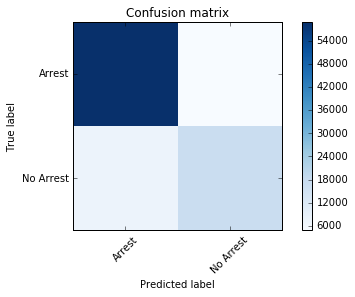

In [19]:
predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm)
accuracies(cm)

In [20]:
# Order of importance
fi = zip(X_train.columns, model.feature_importances_)
fi_sort = sorted(fi, key=lambda (x,y): y, reverse=True)
fi_sort

[('IUCR_1811', 0.067103881133328463),
 ('IUCR_0820', 0.032947038296038358),
 ('IUCR_1320', 0.026932232308971758),
 ('IUCR_0810', 0.026689060759382089),
 ('IUCR_2027', 0.026231623082436598),
 ('IUCR_1330', 0.020534047993835975),
 ('Location Description_RESIDENCE', 0.019098742583204431),
 ('IUCR_2024', 0.018703640220406239),
 ('Location Description_SIDEWALK', 0.018396327872869298),
 ('IUCR_0890', 0.01812848935505626),
 ('IUCR_0460', 0.016924319194975626),
 ('Domestic', 0.015417757531869596),
 ('IUCR_1310', 0.015374667974331622),
 ('IUCR_0910', 0.013961420310834414),
 ('IUCR_0610', 0.013813770815038828),
 ('PERCENT HOUSEHOLDS BELOW POVERTY', 0.013336593265448934),
 ('Year_2003', 0.012477296847212729),
 ('HARDSHIP INDEX', 0.012423706899760906),
 ('PER CAPITA INCOME ', 0.012098421279427021),
 ('Year_2007', 0.012052669092932049),
 ('Year_2005', 0.011798465524833324),
 ('Year_2006', 0.011774615047446374),
 ('Year_2004', 0.011709524397339899),
 ('IUCR_0860', 0.011645820109037301),
 ('PERCENT A

notes

https://data.cityofchicago.org/api/views/c7ck-438e/rows.json?accessType=DOWNLOAD

```
"1811", "NARCOTICS", "POSS: CANNABIS 30GMS OR LESS"
"820", "THEFT", "$500 AND UNDER"
"810", "THEFT", "OVER $500"
"1320", "CRIMINAL DAMAGE", "TO VEHICLE"
"2027", "NARCOTICS", "POSS: CRACK"
```

In [76]:
# AdaBoost with default params
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

dt = DecisionTreeClassifier(max_depth=2, class_weight='balanced')
options = {'learning_rate': [0.1, 0.01, 0.001, 0.05], 'n_estimators': [5, 10, 15, 50]}
model = AdaBoostClassifier(dt, learning_rate=0.1, n_estimators=30)

In [77]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.82168115680886522

[[62381  1290]
 [14544 10581]]
No Arrest Acc: 0.979739598875
Arrest Acc: 0.421134328358
Avg Acc: 0.700436963617


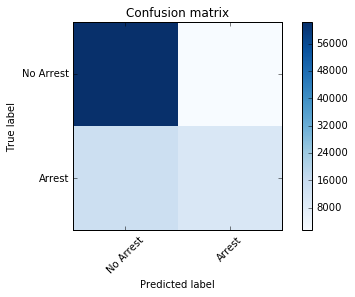

In [78]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm)
accuracies(cm)

In [67]:
# Order of importance
fi = zip(X_train.columns, model.feature_importances_)
fi_sort = sorted(fi, key=lambda (x,y): y, reverse=True)
fi_sort

[('IUCR_0274', inf),
 ('IUCR_0430', inf),
 ('IUCR_0558', inf),
 ('IUCR_3800', inf),
 ('IUCR_041B', 0.073359567291045424),
 ('IUCR_3610', 0.032910769489498191),
 ('IUCR_1205', 0.022859766517466892),
 ('IUCR_0337', 0.0099034526705516768),
 ('IUCR_0580', 0.0057676469538712645),
 ('IUCR_0520', 0.0031574048566969637),
 ('IUCR_1245', 0.0013406239454471212),
 ('IUCR_2090', 0.00069441398698168123),
 ('IUCR_1790', 0.00060683481452232025),
 ('IUCR_3970', 0.0003356903202554511),
 ('IUCR_3910', 0.00020106726432618827),
 ('IUCR_1135', 0.00018231288391570459),
 ('IUCR_033B', 0.00015418932276756769),
 ('Year_2004', 0.00013819536123988769),
 ('IUCR_0930', 0.00013465305640282017),
 ('IUCR_0488', 0.00011777663396414215),
 ('IUCR_1535', 0.00010737131407577132),
 ('IUCR_3960', 0.00010294426003001958),
 ('Year_2006', 9.2851665886466798e-05),
 ('IUCR_033A', 9.1484614478773074e-05),
 ('IUCR_0610', 9.0484330554143298e-05),
 ('IUCR_051B', 8.5711638935629143e-05),
 ('IUCR_2080', 8.5327285352641545e-05),
 ('IUCR